# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [36]:
df = pd.read_csv("./data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [38]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [39]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [40]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [41]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [42]:
df.isna().count()

num_passengers           50000
sales_channel            50000
trip_type                50000
purchase_lead            50000
length_of_stay           50000
flight_hour              50000
flight_day               50000
route                    50000
booking_origin           50000
wants_extra_baggage      50000
wants_preferred_seat     50000
wants_in_flight_meals    50000
flight_duration          50000
booking_complete         50000
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
corr = df.corr()
corr["booking_complete"].sort_values(ascending=False)

<ipython-input-15-959577a7f2c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64

<ipython-input-16-30582755270f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df.corr()


<Axes: >

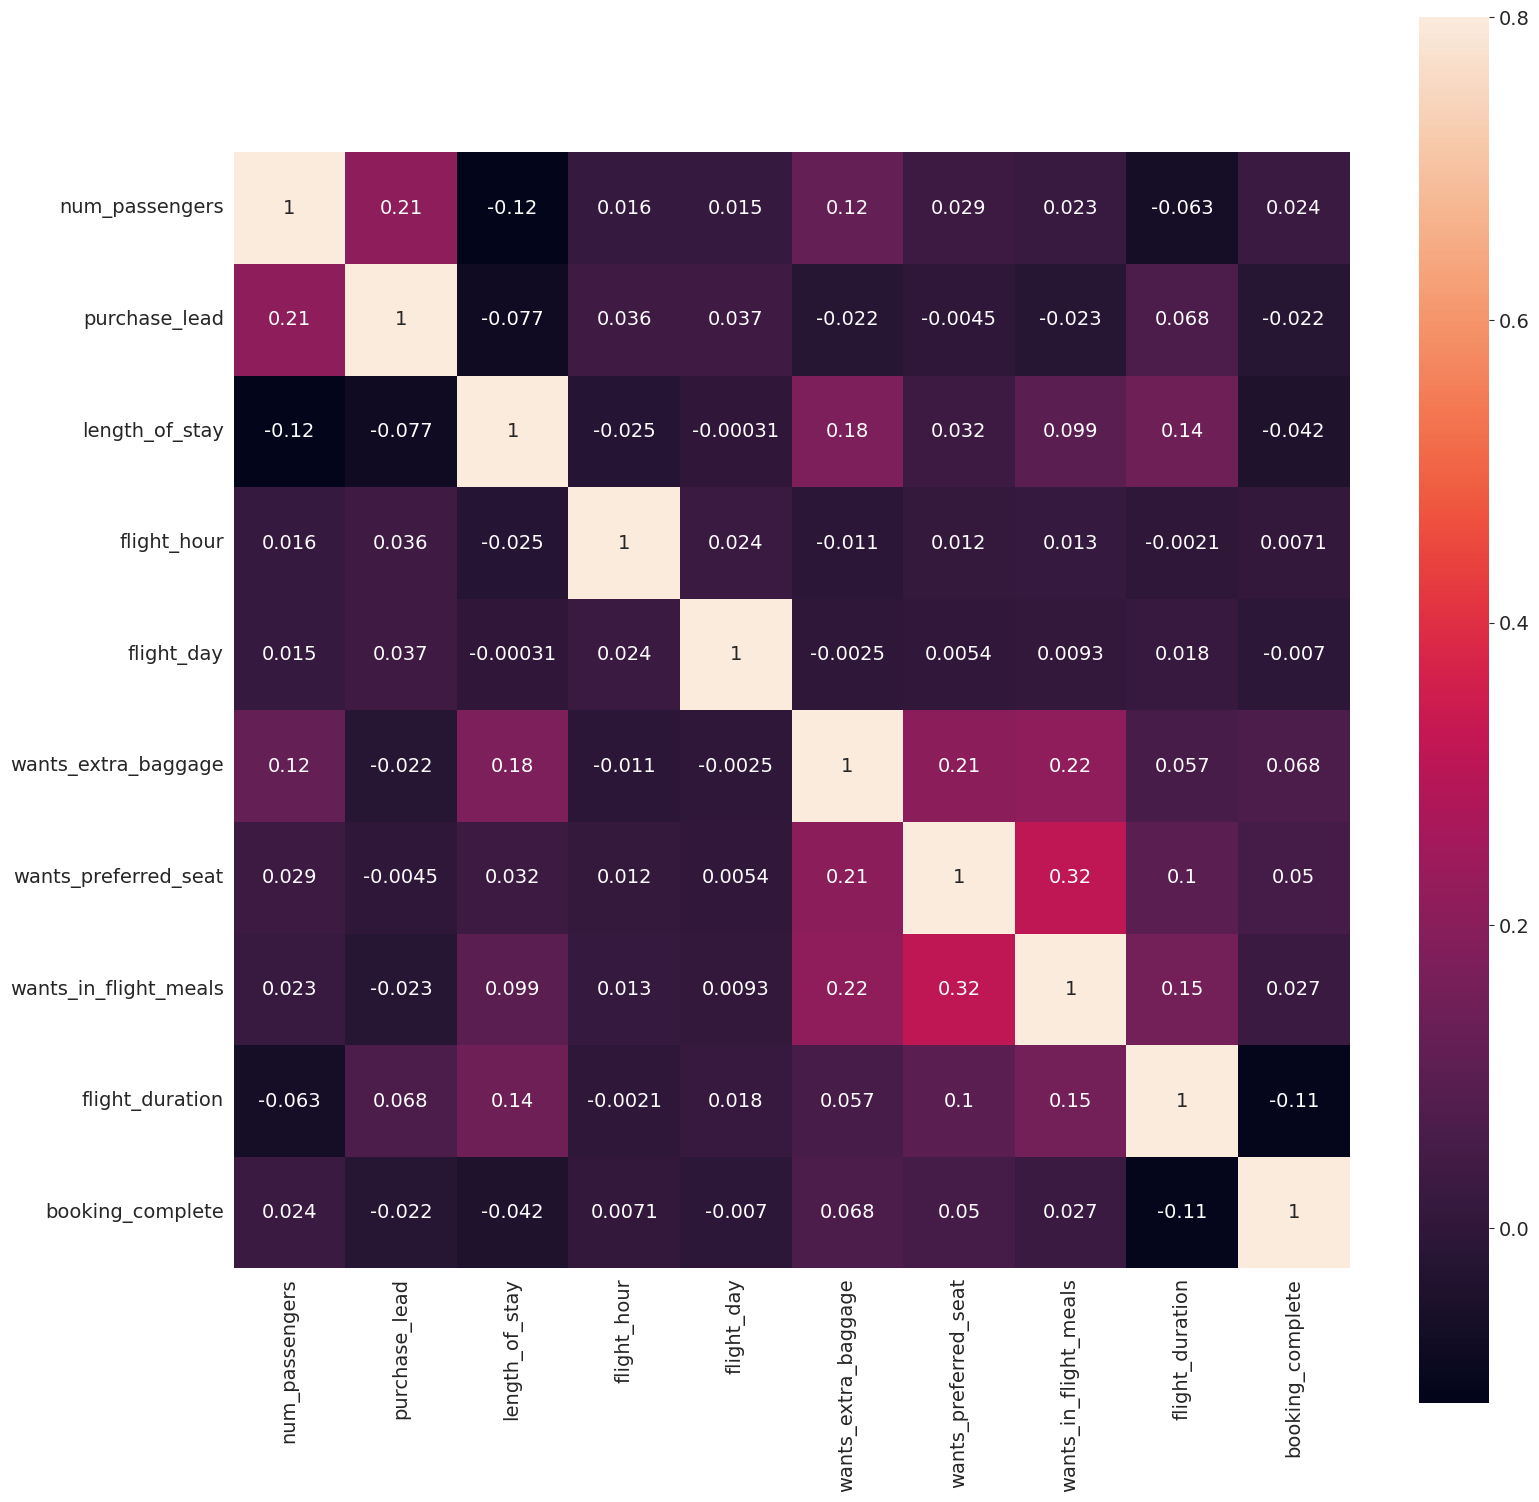

In [16]:
corr_m = df.corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_m, vmax=.8, square=True,  annot=True)

In [20]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [43]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [44]:
df=df[df.num_passengers < 5].copy()
df=df[df.purchase_lead < 150].copy()
df=df[df.length_of_stay < 40].copy()

In [45]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000,33707.000000
mean,1.453081,48.269647,13.266592,9.065090,3.794820,0.637820,0.294657,0.414780,7.205578,0.153381
std,0.738458,37.839827,10.753268,5.367161,1.947746,0.480638,0.455895,0.492691,1.492039,0.360359
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,17.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,39.000000,6.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,72.000000,22.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,4.000000,149.000000,39.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [48]:
df.shape

(33707, 14)

In [49]:
train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state=42)

In [50]:
print('train_df size: ', train_df.shape)
print('val_df size: ', val_df.shape)
print('test_df size: ', test_df.shape)

train_df size:  (20223, 14)
val_df size:  (6742, 14)
test_df size:  (6742, 14)


In [66]:
input_col, target_col =train_df.columns[:-1], train_df.columns[-1]
inputs_df, targets = train_df[input_col].copy(), train_df[target_col].copy()

In [67]:
input_col, target_col

(Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
        'length_of_stay', 'flight_hour', 'flight_day', 'route',
        'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
        'wants_in_flight_meals', 'flight_duration'],
       dtype='object'),
 'booking_complete')

In [56]:
# Identify numeric and categorical columns
numeric_cols = train_df[input_col].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df[input_col].select_dtypes(include='object').columns.tolist()

In [57]:
train_inputs = train_df[input_col].copy()
val_inputs = val_df[input_col].copy()
test_inputs = test_df[input_col].copy()

In [63]:
train_targets = train_df[target_col].copy()
val_targets = val_df[target_col].copy()
test_targets = test_df[target_col].copy()

In [71]:
# scale numeric columns
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [72]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [76]:
train_inputs[numeric_cols].describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,20223.000000,20223.000000,20223.000000,20223.000000,20223.000000,20223.000000,20223.000000,20223.000000,20223.000000
mean,0.150489,0.322350,0.339287,0.395613,0.464199,0.640607,0.295406,0.412600,0.524407
std,0.244210,0.253682,0.276852,0.232727,0.324185,0.479834,0.456236,0.492314,0.308106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.114094,0.128205,0.217391,0.166667,0.000000,0.000000,0.000000,0.196687
50%,0.000000,0.255034,0.153846,0.391304,0.500000,1.000000,0.000000,0.000000,0.482402
75%,0.333333,0.483221,0.564103,0.565217,0.666667,1.000000,1.000000,1.000000,0.861284
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-78-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-78-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-78-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [79]:
train_inputs[encoded_cols]

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_BBIMEL,route_BBIOOL,route_BBISYD,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGLGK,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTRZ,route_CKGTWU,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSIN,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBV,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKIX,route_DMKKTM,route_DMKMEL,route_DMKMRU,route_DMKOOL,route_DMKPEK,route_DMKPER,route_DMKPUS,route_DMKPVG,route_DMKSYD,route_DMKTPE,route_DPSHGH,route_DPSHND,route_DPSICN,route_DPSIKA,route_DPSKIX,route_DPSKTM,route_DPSMEL,route_DPSMRU,route_DPSOOL,route_DPSPEK,route_DPSPUS,route_DPSPVG,route_DPSSYD,route_DPSTPE,route_DPSWUH,route_DPSXIY,route_GOIKUL,route_GOIMEL,route_GOIOOL,route_GOIPER,route_GOISYD,route_HANKTM,route_HANMEL,route_HANOOL,route_HANPER,route_HANSYD,route_HDYHGH,route_HDYMEL,route_HDYO

In [82]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [85]:
X_train.shape

(20223, 834)

In [88]:
train_inputs.shape

(20223, 838)

In [89]:
train_inputs

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_BBIMEL,route_BBIOOL,route_BBISYD,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGLGK,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTRZ,route_CKGTWU,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSIN,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBV,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKIX,route_DMKKTM,route_DMKMEL,route_DMKMRU,route_DMKOOL,route_DMKPEK,route_DMKPER,route_DMKPUS,route_DMKPVG,route_DMKSYD,route_DMKTPE,route_DPSHGH,route_DPSHND,route_DPSICN,route_DPSIKA,route_DPSKIX,route_DPSKTM,route_DPSMEL,route_DPSMRU,route_DPSOOL,route_DPSPEK,route_DPSPUS,route_DPSPVG,route_DPSSYD,route_DPSTPE,r

In [87]:
from xgboost import XGBClassifier

In [124]:
X = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
X.fit(X_train, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [137]:
train_preds_X = X.predict(X_train)
train_rmse_X = mean_squared_error(train_preds_X, train_targets, squared=False)
val_preds_X = X.predict(X_val)
val_rmse_X = mean_squared_error(val_preds_X, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse_X, val_rmse_X))
print('Val ACCURACY: ', accuracy_score(val_targets, val_preds_X)*100)

Train RMSE: 0.39760196970289946, Validation RMSE: 0.3931329863317929
Val ACCURACY:  84.54464550578463


In [140]:
score_train =X.score(X_train, train_targets)
score_val =X.score(X_val, val_targets)
print('train score: ', score_train)
print('val score: ', score_val)

train score:  0.8419126736883746
val score:  0.8454464550578463


In [131]:
model_importances = X.feature_importances_
model_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

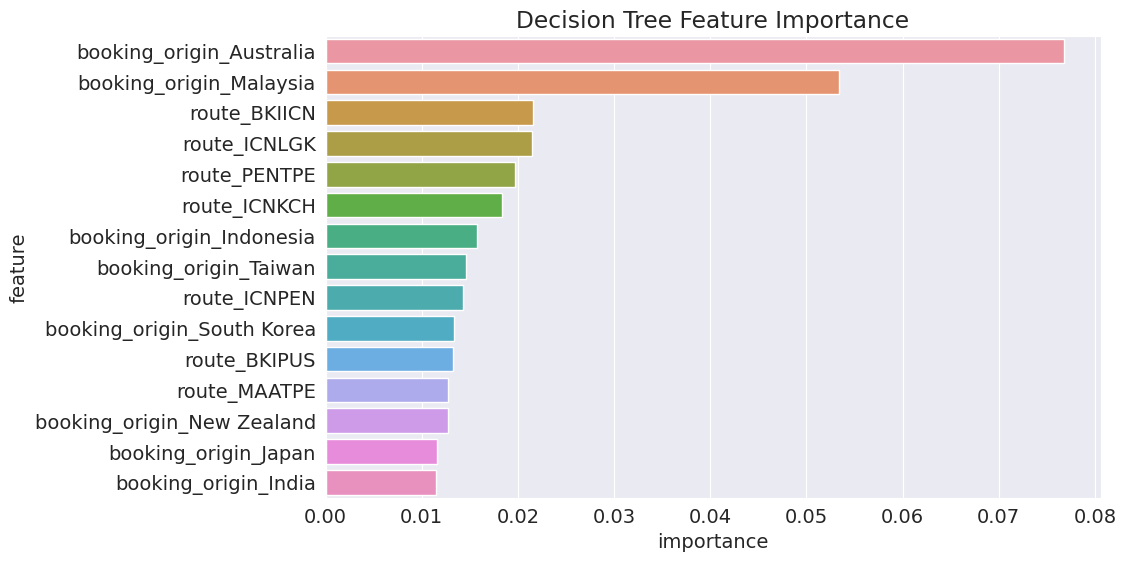

In [132]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(15), x='importance', y='feature');

In [116]:
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_BBIMEL,route_BBIOOL,route_BBISYD,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGLGK,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTRZ,route_CKGTWU,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSIN,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBV,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKIX,route_DMKKTM,route_DMKMEL,route_DMKMRU,route_DMKOOL,route_DMKPEK,route_DMKPER,route_DMKPUS,route_DMKPVG,route_DMKSYD,route_DMKTPE,route_DPSHGH,route_DPSHND,route_DPSICN,route_DPSIKA,route_DPSKIX,route_DPSKTM,route_DPSMEL,route_DPSMRU,route_DPSOOL,route_DPSPEK,route_DPSPUS,route_DPSPVG,route_DPSSYD,route_DPSTPE,route_DPSWUH,route_DPSXIY,route_GOIKUL,route_G

In [133]:
X.fit(X_test, test_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [134]:
test_preds = X.predict(X_test)
test_rmse_X = mean_squared_error(test_preds, test_targets, squared=False)
print('Test RMSE: {}'.format(test_rmse_X))
print('Test ACCURACY: ', accuracy_score(test_targets, test_preds)*100)

Test RMSE: 0.3495982353140218
ACCURACY:  87.77810738653218


In [141]:
score_test =X.score(X_test, test_targets)
print('Test score: ', score_test)

Test score:  0.8777810738653219
